# Resource competition for zooplankton in the Southern Ocean
### SP concentration versus Diatom concentration

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob

import xarray as xr
import numpy as np

import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

from statistics import mean
from matplotlib import style
from scipy import stats
import matplotlib.path as mpath
import math
import cmocean

#### ACC 1920s

In [3]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_ACC-1920s.nc'
ds_acc_1920s=xr.open_dataset(file)

#### ACC 2090s

In [4]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_ACC-2090s.nc'
ds_acc_2090s=xr.open_dataset(file)

#### SIZ 1920s

In [5]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_SIZ-1920s.nc'
ds_siz_1920s=xr.open_dataset(file)

#### SIZ 2090s

In [6]:
file = '/glade/scratch/kristenk/CESM-LE-output/seasonal_upper_50m_means_SIZ-2090s.nc'
ds_siz_2090s=xr.open_dataset(file)

In [7]:
ds_acc_1920s.spC_50m_zint

<xarray.DataArray 'spC_50m_zint' (season: 4)>
array([86.361581, 24.361894, 14.043583, 55.793428])
Coordinates:
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
Attributes:
    long_name:     50m depth-integrated small phytoplankton carbon
    units:         mmol m-2
    grid_loc:      3114
    cell_methods:  time: mean

## start work on resource competition, parameter values are from CESM1

#### cycle through values and calculate grazing rate for sp and diat, taking difference

In [8]:
### Specify parameters
Tref = 30.
q10 = 2.0

Gmax_sp = 2.5 #per day
Gmax_diat = 1.95 #per day

km_sp = 1 #mmol/m3
km_diat = 0.84 #mmol/m3

## biomass ranges
diatC_vals = np.arange(0,3.5,0.035)
spC_vals = np.arange(0,3.5,0.035)

## initialize empty matrices
sp_grazingrate_acc2090s = np.full((100,100),np.nan)
diat_grazingrate_acc2090s = np.full((100,100),np.nan)

i=0
j=0

T=7

for spC in spC_vals: # i loop
    
    for diatC in diatC_vals: # j loop
        
        Tfunc = q10**((T - Tref) / 10.)
        
        ##### small phytoplankton
        spC_lim = (spC**2)/(spC**2 + km_sp**2)
        
        sp_grazingrate_acc2090s[j,i] = Gmax_sp * Tfunc * spC_lim
        
        #### diatoms
        diatC_lim = (diatC**2)/(diatC**2 + km_diat**2)
        
        diat_grazingrate_acc2090s[j,i] = Gmax_diat * Tfunc * diatC_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_grazingrate_acc2090s = xr.DataArray(sp_grazingrate_acc2090s,dims=('diatC_vals','spC_vals'))
diat_grazingrate_acc2090s = xr.DataArray(diat_grazingrate_acc2090s,dims=('diatC_vals','spC_vals'))

In [18]:
### Specify parameters
Tref = 30.
q10 = 2.0

Gmax_sp = 2.5 #per day
Gmax_diat = 1.95 #per day

km_sp = 1 #mmol/m3
km_diat = 0.84 #mmol/m3

## biomass ranges
diatC_vals = np.arange(0,3.5,0.035)
spC_vals = np.arange(0,3.5,0.035)

## initialize empty matrices
sp_grazingrate_siz2090s = np.full((100,100),np.nan)
diat_grazingrate_siz2090s = np.full((100,100),np.nan)

i=0
j=0

T=-0.028

for spC in spC_vals: # i loop
    
    for diatC in diatC_vals: # j loop
        
        Tfunc = q10**((T - Tref) / 10.)
        
        ##### small phytoplankton
        spC_lim = (spC**2)/(spC**2 + km_sp**2)
        
        sp_grazingrate_siz2090s[j,i] = Gmax_sp * Tfunc * spC_lim
        
        #### diatoms
        diatC_lim = (diatC**2)/(diatC**2 + km_diat**2)
        
        diat_grazingrate_siz2090s[j,i] = Gmax_diat * Tfunc * diatC_lim
        
        j = j + 1
        
    i = i + 1
    j = 0
    
sp_grazingrate_siz2090s = xr.DataArray(sp_grazingrate_siz2090s,dims=('diatC_vals','spC_vals'))
diat_grazingrate_siz2090s = xr.DataArray(diat_grazingrate_siz2090s,dims=('diatC_vals','spC_vals'))

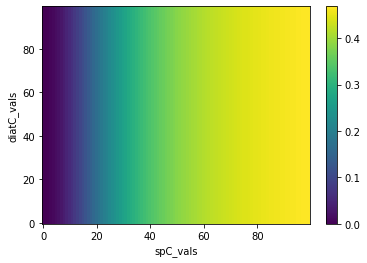

In [9]:
sp_grazingrate_acc2090s.plot()

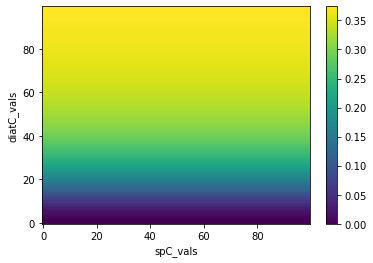

In [10]:
diat_grazingrate_acc2090s.plot()

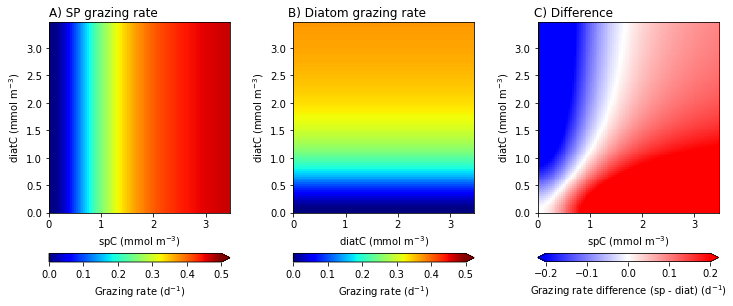

In [15]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1,3,1)
ax.set_title('A) SP grazing rate', x=0.3)
pc=ax.pcolormesh(spC_vals, diatC_vals, sp_grazingrate_acc2090s,cmap='jet',vmin=0,vmax=0.5)
ax.set_ylabel('diatC (mmol m$^{-3}$)')
ax.set_xlabel('spC (mmol m$^{-3}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Grazing rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,2)
ax.set_title('B) Diatom grazing rate', x=0.35)
pc=ax.pcolormesh(spC_vals, diatC_vals, diat_grazingrate_acc2090s,cmap='jet',vmin=0,vmax=0.5)
ax.set_ylabel('diatC (mmol m$^{-3}$)')
ax.set_xlabel('diatC (mmol m$^{-3}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Grazing rate (d$^{-1}$)',orientation='horizontal')

ax = fig.add_subplot(1,3,3)
ax.set_title('C) Difference', x=0.2)
pc=ax.pcolormesh(spC_vals, diatC_vals, sp_grazingrate_acc2090s-diat_grazingrate_acc2090s,cmap='bwr',vmin=-0.2,vmax=0.2)
ax.set_ylabel('diatC (mmol m$^{-3}$)')
ax.set_xlabel('spC (mmol m$^{-3}$)')
#labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
#ax.set_xticklabels(labels)
#cbar1 = fig.colorbar(pc, ax=ax,extend='both',label='Growth rate (d$^{-1}$)',orientation='horizontal')

cbar = fig.colorbar(pc, ax=ax,extend='both',label='Grazing rate difference (sp - diat) (d$^{-1}$)',orientation='horizontal') #, ticks=[-0.1,-0.05,0,0.05,0.1])
#cbar.ax.set_yticklabels(['-0.1','-0.05','0','0.05','0.1']) 

plt.subplots_adjust(wspace=0.35)

#fig.savefig('/glade/work/kristenk/figs/example_resource_comp.png', bbox_inches='tight', dpi=300, format='png');

In [16]:
SIZ_plotvals_2090s = xr.concat([ds_siz_2090s, ds_siz_2090s.isel(season=0)],dim='season')
SIZ_plotvals_1920s = xr.concat([ds_siz_1920s, ds_siz_1920s.isel(season=0)],dim='season')
ACC_plotvals_2090s = xr.concat([ds_acc_2090s, ds_acc_2090s.isel(season=0)],dim='season')
ACC_plotvals_1920s = xr.concat([ds_acc_1920s, ds_acc_1920s.isel(season=0)],dim='season')

In [17]:
annotations = ds_acc_1920s.season.values

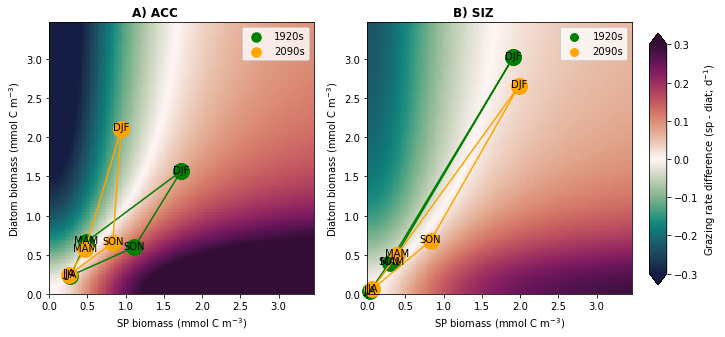

In [24]:
fig = plt.figure(figsize=(12,5))


######################################################### ACC
ax = fig.add_subplot(1,2,1)

ax.set_title('A) ACC',x=0.4,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(spC_vals, diatC_vals, sp_grazingrate_acc2090s-diat_grazingrate_acc2090s,cmap=cmocean.cm.curl,vmin=-0.3,vmax=0.3)
ax.set_xlabel('SP biomass (mmol C m$^{-3}$)')
ax.set_ylabel('Diatom biomass (mmol C m$^{-3}$)')

#1920s
#s = [ACC_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_1920s.spC_50m_zint.values/50.,ACC_plotvals_1920s.diatC_50m_zint.values/50.,
        marker='o',s=250,color='green',label='1920s', zorder=1)
ax.plot(ACC_plotvals_1920s.spC_50m_zint.values/50.,ACC_plotvals_1920s.diatC_50m_zint.values/50.,
        color='green',zorder=1)

# #2090s
#s = [ACC_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(ACC_plotvals_2090s.spC_50m_zint.values/50.,ACC_plotvals_2090s.diatC_50m_zint.values/50.,
        marker='o',s=250,color='orange',label='2090s',zorder=2)
ax.plot(ACC_plotvals_2090s.spC_50m_zint.values/50.,ACC_plotvals_2090s.diatC_50m_zint.values/50.,
        color='orange',zorder=2)

## add season labels
plt.annotate(annotations[0], (ds_acc_1920s.spC_50m_zint.values[0]/50., ds_acc_1920s.diatC_50m_zint.values[0]/50.-0.02), fontsize=10, ha='center')
plt.annotate(annotations[1], (ds_acc_1920s.spC_50m_zint.values[1]/50., ds_acc_1920s.diatC_50m_zint.values[1]/50.-0.02), fontsize=10, ha='center')
plt.annotate(annotations[2], (ds_acc_1920s.spC_50m_zint.values[2]/50., ds_acc_1920s.diatC_50m_zint.values[2]/50.-0.02), fontsize=10, ha='center')
plt.annotate(annotations[3], (ds_acc_1920s.spC_50m_zint.values[3]/50., ds_acc_1920s.diatC_50m_zint.values[3]/50.-0.02), fontsize=10, ha='center')

plt.annotate(annotations[0], (ds_acc_2090s.spC_50m_zint.values[0]/50., ds_acc_2090s.diatC_50m_zint.values[0]/50.-0.02), fontsize=10, ha='center')
plt.annotate(annotations[1], (ds_acc_2090s.spC_50m_zint.values[1]/50., ds_acc_2090s.diatC_50m_zint.values[1]/50.-0.02), fontsize=10, ha='center')
plt.annotate(annotations[2], (ds_acc_2090s.spC_50m_zint.values[2]/50., ds_acc_2090s.diatC_50m_zint.values[2]/50.-0.02), fontsize=10, ha='center')
plt.annotate(annotations[3], (ds_acc_2090s.spC_50m_zint.values[3]/50., ds_acc_2090s.diatC_50m_zint.values[3]/50.-0.02), fontsize=10, ha='center')


ax.legend(markerscale=0.6,scatterpoints=1, fontsize=10)
# ### add x axis labels in nmol/m3
# labels = ['0.0','0.05','0.1','0.15','0.20','0.25','0.30','0.35','0.40']
# ax.set_xticklabels(labels)

######################################################### SIZ

ax = fig.add_subplot(1,2,2)

ax.set_title('B) SIZ', x=0.4,y=1, fontsize=12, fontweight='bold')
pc=ax.pcolormesh(spC_vals, diatC_vals, sp_grazingrate_siz2090s-diat_grazingrate_siz2090s,cmap=cmocean.cm.curl,vmin=-0.3,vmax=0.3)
ax.set_ylabel('Diatom biomass (mmol C m$^{-3}$)')
ax.set_xlabel('SP biomass (mmol C m$^{-3}$)')

#1920s
#s = [SIZ_plotvals_1920s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_1920s.spC_50m_zint.values/50.,SIZ_plotvals_1920s.diatC_50m_zint.values/50.,
        marker='o',s=250,color='green',label='1920s',clip_on=False,zorder=1)
ax.plot(SIZ_plotvals_1920s.spC_50m_zint.values/50.,SIZ_plotvals_1920s.diatC_50m_zint.values/50.,
        color='green',zorder=1)

# #1990s
#s = [SIZ_plotvals_2090s.phytoC_50m_zint.values*2]
ax.scatter(SIZ_plotvals_2090s.spC_50m_zint.values/50.,SIZ_plotvals_2090s.diatC_50m_zint.values/50.,
        marker='o',s=250,color='orange',label='2090s',clip_on=False,zorder=2)
ax.plot(SIZ_plotvals_2090s.spC_50m_zint.values/50.,SIZ_plotvals_2090s.diatC_50m_zint.values/50.,
       color='orange',zorder=2)

# # add season labels
plt.annotate(annotations[0], (ds_siz_1920s.spC_50m_zint.values[0]/50., ds_siz_1920s.diatC_50m_zint.values[0]/50-0.02), fontsize=10, ha='center')
plt.annotate(annotations[1], (ds_siz_1920s.spC_50m_zint.values[1]/50., ds_siz_1920s.diatC_50m_zint.values[1]/50-0.02), fontsize=10, ha='center')
plt.annotate(annotations[2], (ds_siz_1920s.spC_50m_zint.values[2]/50., ds_siz_1920s.diatC_50m_zint.values[2]/50-0.02), fontsize=10, ha='center')
plt.annotate(annotations[3], (ds_siz_1920s.spC_50m_zint.values[3]/50., ds_siz_1920s.diatC_50m_zint.values[3]/50-0.02), fontsize=10, ha='center')

plt.annotate(annotations[0], (ds_siz_2090s.spC_50m_zint.values[0]/50., ds_siz_2090s.diatC_50m_zint.values[0]/50-0.02), fontsize=10, ha='center')
plt.annotate(annotations[1], (ds_siz_2090s.spC_50m_zint.values[1]/50., ds_siz_2090s.diatC_50m_zint.values[1]/50-0.02), fontsize=10, ha='center')
plt.annotate(annotations[2], (ds_siz_2090s.spC_50m_zint.values[2]/50., ds_siz_2090s.diatC_50m_zint.values[2]/50-0.02), fontsize=10, ha='center')
plt.annotate(annotations[3], (ds_siz_2090s.spC_50m_zint.values[3]/50., ds_siz_2090s.diatC_50m_zint.values[3]/50-0.02), fontsize=10, ha='center')

ax.legend(markerscale=0.5,scatterpoints=1, fontsize=10)

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, extend='both', label='Grazing rate difference (sp - diat; d$^{-1}$)');

#fig.savefig('/glade/work/kristenk/figs/Fe_PAR_resource_competition.png', bbox_inches='tight', dpi=300, format='png');